# Ridge Regression

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [144]:
data = {
    'x': np.arange(10),
    'y': np.arange(10) + np.random.randn(10)
#     'y': np.arange(10)
}
df = pd.DataFrame(data)
df.head()

,x,y
0,0,0.350588
1,1,2.377078
2,2,1.691862
3,3,1.255050
4,4,4.840782


<hr>

### Linear Regression tanpa splitting dataset

In [145]:
model = LinearRegression()
model.fit(df[['x']], df['y'])

df['y"'] = model.predict(df[['x']])
df.head()

,x,y,"y"""
0,0,0.350588,0.194154
1,1,2.377078,1.215549
2,2,1.691862,2.236944
3,3,1.255050,3.258338
4,4,4.840782,4.279733


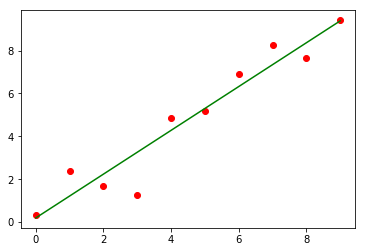

In [146]:
plt.plot(df['x'], df['y'], 'ro')
plt.plot(df['x'], df['y"'], 'g-')

In [147]:
# RMSE
from sklearn.metrics import mean_squared_error
print('MSE:', mean_squared_error(df['y'], df['y"']))
print('RMSE:', np.sqrt(mean_squared_error(df['y'], df['y"'])))

MSE: 0.7667457603032612
RMSE: 0.8756402002553682


<hr>

### Linear Regression: split data, namun hanya 2 data pertama sbg training

In [148]:
# fit model hanya dari 2 data pertama
model.fit(df[['x']].iloc[:2], df['y'].iloc[:2])
df['y"2'] = model.predict(df[['x']])
df

,x,y,"y""","y""2"
0,0,0.350588,0.194154,0.350588
1,1,2.377078,1.215549,2.377078
2,2,1.691862,2.236944,4.403569
3,3,1.255050,3.258338,6.430059
4,4,4.840782,4.279733,8.456550
5,5,5.180799,5.301128,10.483040
6,6,6.899308,6.322523,12.509531
7,7,8.242535,7.343918,14.536021
8,8,7.648955,8.365312,16.562512
9,9,9.417348,9.386707,18.589002


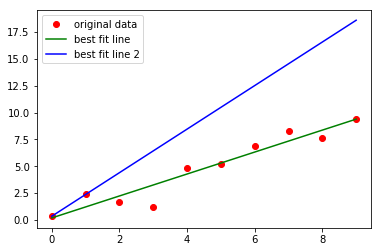

In [149]:
plt.plot(df['x'], df['y'], 'ro')
plt.plot(df['x'], df['y"'], 'g-')
plt.plot(df['x'], df['y"2'], 'b-')
plt.legend(['original data', 'best fit line', 'best fit line 2'])

<hr>

### Ridge Regression

L2 regularization: menambahkan ralat/penalty MSE = MSE $\displaystyle + \lambda \times m^2$

Di Sklearn, kekuatan nilai penalty dilambangkan dengan alpha $\displaystyle \alpha$

Jika nilai penalty = 0, maka hasil akan sama dengan __Linear Regression__ biasa

In [150]:
from sklearn.linear_model import Ridge

In [155]:
# modelR = Ridge(alpha=0) # alpha=0 == linear regression biasa, alpha default = 1
modelR = Ridge(alpha=1)
modelR.fit(df[['x']].iloc[:2], df['y'].iloc[:2])
df['y"Ridge'] = modelR.predict(df[['x']])
df

,x,y,"y""","y""2","y""Ridge"
0,0,0.350588,0.194154,0.350588,1.026085
1,1,2.377078,1.215549,2.377078,1.701582
2,2,1.691862,2.236944,4.403569,2.377078
3,3,1.255050,3.258338,6.430059,3.052575
4,4,4.840782,4.279733,8.456550,3.728072
5,5,5.180799,5.301128,10.483040,4.403569
6,6,6.899308,6.322523,12.509531,5.079066
7,7,8.242535,7.343918,14.536021,5.754563
8,8,7.648955,8.365312,16.562512,6.430059
9,9,9.417348,9.386707,18.589002,7.105556


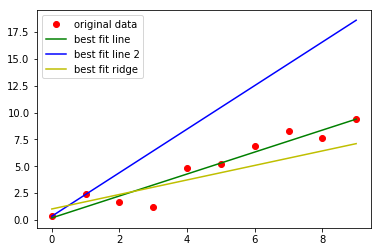

In [156]:
plt.plot(df['x'], df['y'], 'ro')
plt.plot(df['x'], df['y"'], 'g-')
plt.plot(df['x'], df['y"2'], 'b-')
plt.plot(df['x'], df['y"Ridge'], 'y-')
plt.legend(['original data', 'best fit line', 'best fit line 2', 'best fit ridge'])

<hr>

### Lasso Regression

L1 regularization: menambahkan ralat/penalty MSE = MSE $\displaystyle + \lambda \times |m|$

Di Sklearn, kekuatan nilai penalty dilambangkan dengan alpha $\displaystyle \alpha$

Jika nilai penalty = 0, maka hasil akan sama dengan __Linear Regression__ biasa

In [190]:
from sklearn.linear_model import Lasso

modelL = Lasso(alpha=0.3)
modelL.fit(df[['x']].iloc[:2], df['y'].iloc[:2])
df['y"Lasso'] = modelL.predict(df[['x']])
df

,x,y,"y""","y""2","y""Ridge","y""Lasso"
0,0,0.350588,0.194154,0.350588,1.026085,0.950588
1,1,2.377078,1.215549,2.377078,1.701582,1.777078
2,2,1.691862,2.236944,4.403569,2.377078,2.603569
3,3,1.255050,3.258338,6.430059,3.052575,3.430059
4,4,4.840782,4.279733,8.456550,3.728072,4.256550
5,5,5.180799,5.301128,10.483040,4.403569,5.083040
6,6,6.899308,6.322523,12.509531,5.079066,5.909531
7,7,8.242535,7.343918,14.536021,5.754563,6.736021
8,8,7.648955,8.365312,16.562512,6.430059,7.562512
9,9,9.417348,9.386707,18.589002,7.105556,8.389002


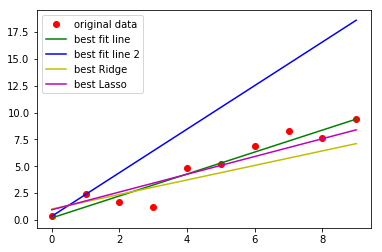

In [191]:
plt.plot(df['x'], df['y'], 'ro')
plt.plot(df['x'], df['y"'], 'g-')
plt.plot(df['x'], df['y"2'], 'b-')
plt.plot(df['x'], df['y"Ridge'], 'y-')
plt.plot(df['x'], df['y"Lasso'], 'm-')
plt.legend(['original data', 'best fit line', 'best fit line 2', 'best Ridge', 'best Lasso'])